In [117]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

Example of loading a dataset from the file datasets.txt:

In [118]:
datasets = open("datasets.txt","r")
datasets = datasets.read().splitlines()
# remove blank lines
for i in range(len(datasets)-1):
    if not datasets[i]:
        datasets.pop(i)
raw_current_dataset = datasets[0].split(",")
raw_current_dataset.pop(len(raw_current_dataset)-1)
current_dataset = [float(val) for val in raw_current_dataset]
current_dataset

[-0.1414161097559577,
 10.0,
 -0.15742931535026083,
 14.337,
 -0.17343369114720517,
 18.663,
 -0.18635861475762877,
 23.0,
 -0.19264235346110903,
 27.337,
 -0.1973368035054794,
 31.663,
 -0.20052491719942955,
 36.0,
 -0.20321556422883802,
 40.337,
 -0.20534931202874823,
 44.663,
 -0.2066253559820545,
 49.0,
 -0.20805003370657155,
 53.337,
 -0.2092337428159892,
 57.663,
 -0.21019425650562173,
 62.0,
 -0.21137976675272585,
 66.337,
 -0.21195339530258223,
 70.663]

Open file and process data into correct type:

In [119]:
raw_data = open("entropy_data.txt","r")
raw_data = raw_data.read().split(",")
# there is a blank value at the end therefore remove it
raw_data.pop()

processed_data = []
for i in range(len(raw_data)):
    processed_data.append(float(raw_data[i]))

Split data into 2 separate lists:

In [120]:
distance, entropy = [], []
for i in range(len(processed_data)):
    if i == 0 or i%2 == 0:
        entropy.append(processed_data[i])
    else:
        distance.append(processed_data[i])

Plot entropy against distance:

Text(0.5, 1.0, 'Plot of entropy against distance')

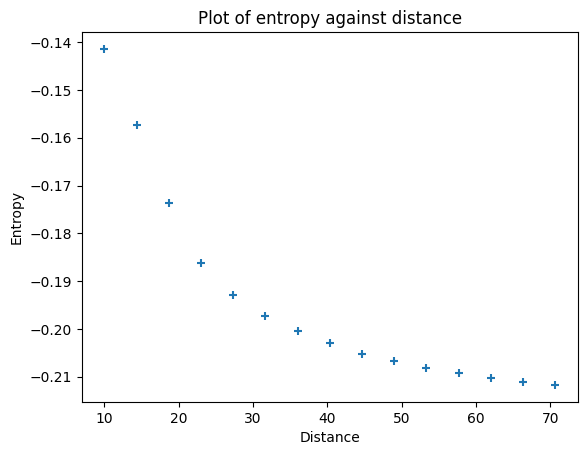

In [121]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Plot of entropy against distance")

Plot gradient against distance:

In [122]:
x_values,y_values = [],[]
for i in range(0,len(processed_data),2):
    x_values.append(processed_data[i+1])
    y_values.append(processed_data[i])

In [123]:
p = np.polyfit(x_values,y_values,3)
p

array([-7.63439623e-07,  1.21854342e-04, -6.58102462e-03, -8.73660093e-02])

Text(0.5, 1.0, 'Fitting a polynomial curve')

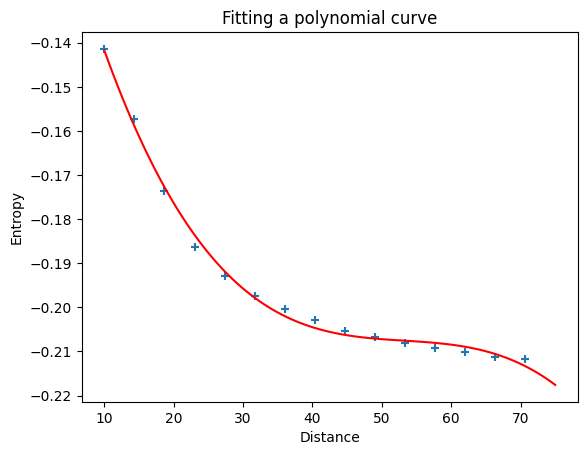

In [124]:
x = np.linspace(10,75,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting a polynomial curve")

In [125]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 0.60827711, -0.81375269, -0.23214814])

Text(0.5, 1.0, 'Fitting an exponential curve')

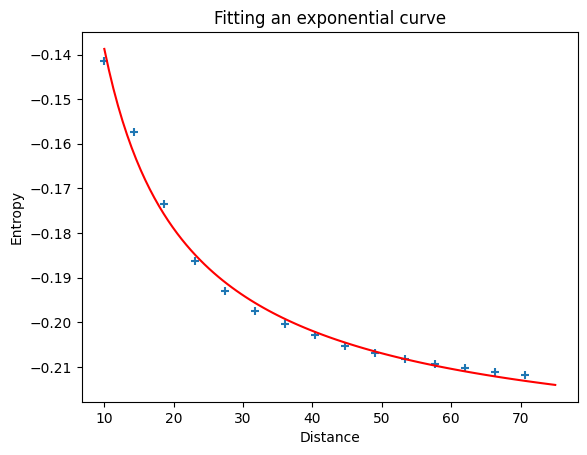

In [126]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting an exponential curve")

Calculate gradient between points and graph

In [127]:
gradient_vals = []

for i in range(len(entropy)-1):
    dS = entropy[i+1] - entropy[i]
    dx = distance[i+1] - distance[i]
    x = distance[i] + dx/2
    gradient_vals.append((dS/dx,x))


Text(0.5, 1.0, 'Plotting dS/dx against distance(x)')

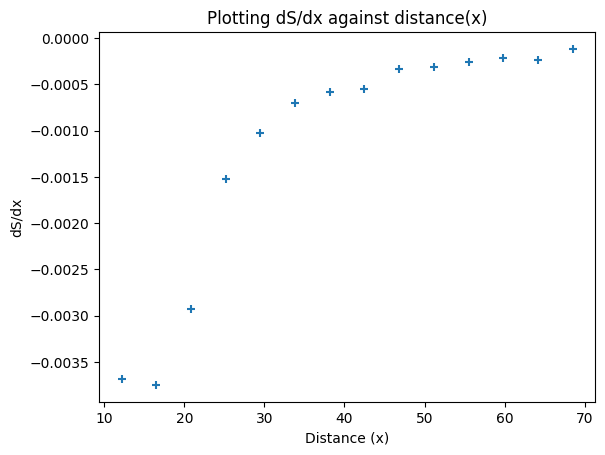

In [128]:
grad_xs, grad_ys = [],[]
for coord in gradient_vals:
    grad_ys.append(coord[0])
    grad_xs.append(coord[1])
#grad_xs.pop(0)
#grad_ys.pop(0)
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Plotting dS/dx against distance(x)")

a = 0.00164776159899261 
b = -7.489259196934261 
c = -0.0065705394412265


C:\Users\Josh\AppData\Local\Temp\ipykernel_2784\1207042327.py:2: RuntimeWarning: invalid value encountered in log
  return a * np.log(x+b) + c


Text(0.5, 1.0, 'Fitting a log curve to the data')

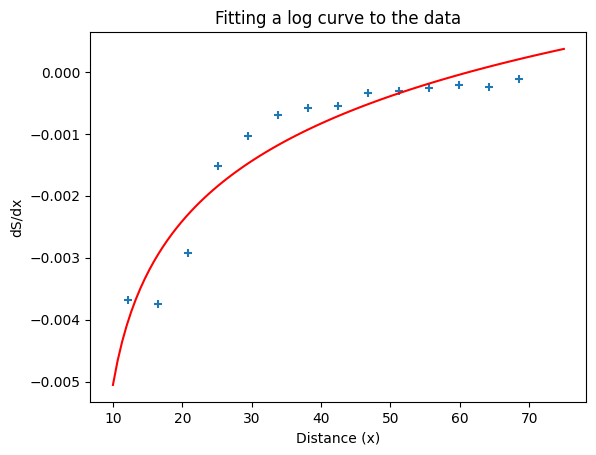

In [129]:
def f(x, a, b, c):
    return a * np.log(x+b) + c

p3 = scipy.optimize.curve_fit(f, xdata=grad_xs,ydata=grad_ys, p0=(0.001,-5,-0.005))[0]
print("a =",p3[0],"\nb =",p3[1],"\nc =",p3[2])

x = np.linspace(10,75,100)

y3 = (p3[0] * np.log(x+p3[1])) + p3[2]

plt.plot(x,y3,"red")
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Fitting a log curve to the data")

In [130]:
neg_log_grads = []
log_xs = []

for y in grad_ys:
    neg_log_grads.append(np.log(-1 * y))
for x in grad_xs:
    log_xs.append(np.log(x))

Text(0.5, 1.0, 'ln-ln plot of data')

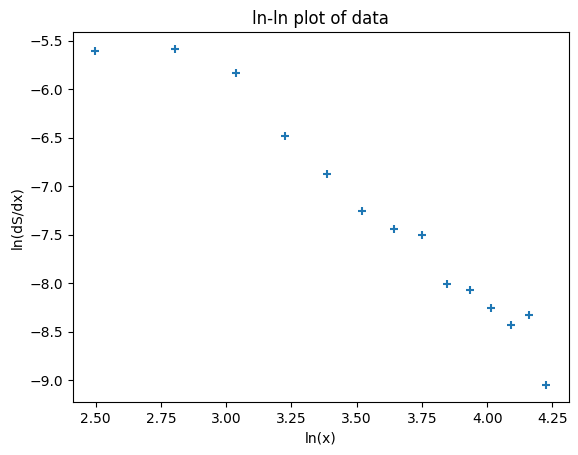

In [131]:
plt.scatter(log_xs,neg_log_grads,marker="+")
plt.xlabel("ln(x)")
plt.ylabel("ln(dS/dx)")
plt.title("ln-ln plot of data")

In [132]:
p4 = np.polyfit(log_xs,neg_log_grads,1)
p4

array([-2.06143729,  0.04352255])

Text(0.5, 1.0, 'Plotting linear LOBF')

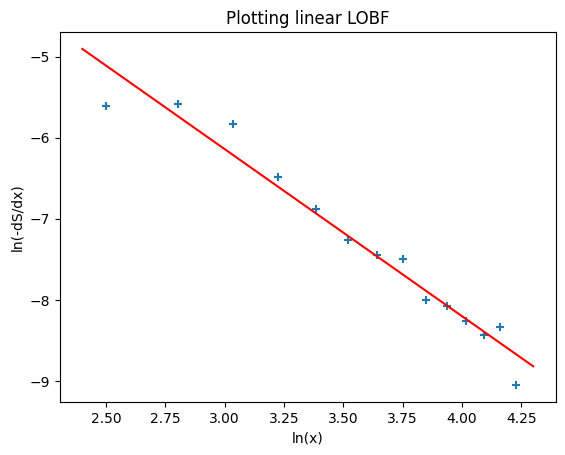

In [133]:
x = np.linspace(2.4,4.3,100)
y = p4[0] * x + p4[1]

plt.scatter(log_xs,neg_log_grads,marker="+")
plt.plot(x,y,"red")
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("Plotting linear LOBF")

In [134]:
print("The gradient of the ln-ln plot is %s"%round(p4[0],9))

The gradient of the ln-ln plot is -2.061437293


# Ideas:

Graph multiple datasets or their LOBFs, calculate mean or median of them

Graph how long varying number of simulations (fix num_chords) takes as well as varying number of chords (fixed num_tests)

Remove first/second data point from gradient graph as it is an outlier and try again